# Investment Analysis Assignment

### Project Brief

Spark Funds (asset management company) wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

#### Spark Funds has two minor constraints for investments:

- It wants to invest between 5 to 15 million USD per round of investment

- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

### Checkpoints - Part 1
##### Checkpoint 1: Data Cleaning 1


In [1]:
#Importing the required python liberaries
import numpy as np
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data from files to dataframes
companies = pd.read_csv("./data/companies.csv", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("./data/rounds2.csv", encoding = "ISO-8859-1")

In [3]:
# Exploring data
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Yospace-Technologies,#NAME?,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [6]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


##### Table 1.1: Understand the Data Set 
- How many unique companies are present in rounds2?	
- How many unique companies are present in companies?	
- In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.	
- Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	
- Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?


In [9]:
# unique companies are present in rounds2
print(len(rounds2.company_permalink.unique()))

90247


In [10]:
# unique companies are present in companies by permalink
print(len(companies.permalink.unique()))

66368


In [11]:
# unique companies are present in companies by name
print(len(companies.name.unique()))

66100


There are Some Irregularites in data because of Case Sensitivity in rounds2 of String So to fix them 

In [12]:
print(len(rounds2.company_permalink.str.upper().unique()))

66370


column can be used as the unique key for each company in companies data frame is `permalink`

In [13]:
# Number of company persent in round2 but not in companies dataframe 
print(len(rounds2.company_permalink.str.upper().unique()) - len(companies.permalink.unique()))

2


In [14]:
# Removing irregularities because of case-sensitivity
companies['permalink'] = companies['permalink'].str.upper()
# create a key for joining of two dataframes as well 
rounds2['permalink'] = rounds2['company_permalink'].str.upper()
print(len(companies.permalink.unique()))
print(len(rounds2.permalink.unique()))

66368
66370


In [15]:
# merging two data Frames

master_frame = pd.merge(companies,rounds2, how='inner', on='permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [16]:
len(master_frame)

114942

In [17]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114942 non-null  object 
 1   name                     114941 non-null  object 
 2   homepage_url             108810 non-null  object 
 3   category_list            111535 non-null  object 
 4   status                   114942 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94422 non-null   object 
 10  company_permalink        114942 non-null  object 
 11  funding_round_permalink  114942 non-null  object 
 12  funding_round_type       114942 non-null  object 
 13  funding_round_code       31139 non-null   object 
 14  fund

* How many unique companies are present in rounds2? `66370`
* How many unique companies are present in companies? `66368`
* In the companies data frame, which column can be used as the unique key for each company? Write the name of the column. `permalink`
* Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N `Y`
* Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame? `114942`

 #### Data Cleaning 

In [18]:
round(100*(master_frame.isnull().sum()/len(master_frame)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [19]:
# Removing the feilds i.e. Not required
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('company_permalink', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)
round(100*(master_frame.isnull().sum()/len(master_frame)), 2)

permalink                   0.00
name                        0.00
category_list               2.96
status                      0.00
country_code                7.54
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [20]:
# Removing of NAN value in raised_amount_usd as we are doing analysis on investment it is important data
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
round(100*(master_frame.isnull().sum()/len(master_frame)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [21]:
# count the number of rows having > 5 missing values
len(master_frame[master_frame.isnull().sum(axis=1) > 1].index)

465

In [22]:
# percentage of 5 missing rows 
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 1].index) / len(master_frame))

0.4896901788158976

In [23]:
# Missing data report post cleanup 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [24]:
# % Rows lost after clean-up
100*(114942 - len(master_frame.index))/114942

17.38615997633589

In [25]:
master_frame['category_list'].describe()

count             93914
unique            23484
top       Biotechnology
freq               7773
Name: category_list, dtype: object

In [26]:
master_frame['raised_amount_usd'].describe()

count    9.495800e+04
mean     1.042696e+07
std      1.148218e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680521e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [27]:
# Imputing 'UNKNOWN' to values of category list and and country code
master_frame['category_list'] = master_frame['category_list'].fillna('UNKOWN')
master_frame['country_code'] = master_frame['country_code'].fillna('UNKOWN')
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

### Checkpoints - Part 1
##### Checkpoint 2: Funding Type Analysis
* Find out `most representative value of the investment amount` for venture, angel, seed, and private equity
* which investment type do you think is the most suitable for Spark Funds?

In [28]:
# For ploting a graphs
import matplotlib.pyplot as plt
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

In [29]:
master_frame['funding_round_type'].value_counts()

venture                  50228
seed                     23602
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: funding_round_type, dtype: int64

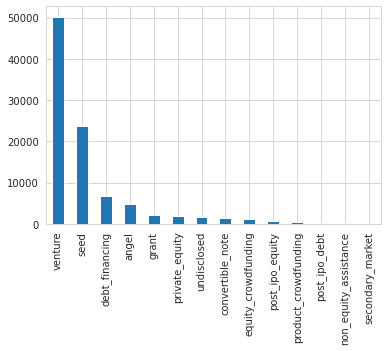

In [30]:
master_frame['funding_round_type'].value_counts().plot.bar()
plt.show()

In [31]:
funding_round_type = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]
funding_round_type.describe()

,raised_amount_usd
count,8.062600e+04
mean,9.348091e+06
std,7.562986e+07
min,0.000000e+00
25%,4.000000e+05
50%,2.000000e+06
75%,7.976016e+06
max,1.760000e+10


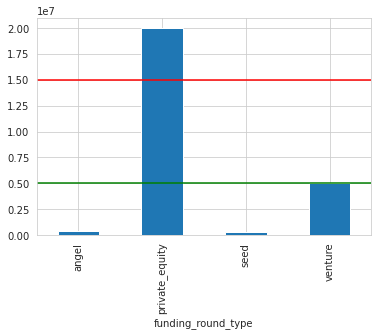

In [32]:
funding_round_type.groupby('funding_round_type')['raised_amount_usd'].median().plot.bar()
plt.axhline(y=5000000, color = 'g')
plt.axhline(y=15000000, color = 'r')
plt.show()

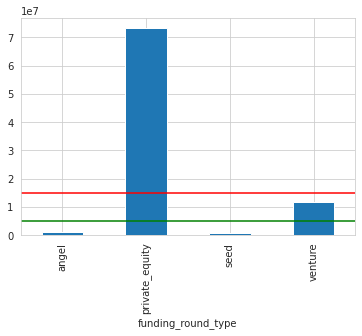

In [33]:
funding_round_type.groupby('funding_round_type')['raised_amount_usd'].mean().plot.bar()
plt.axhline(y=5000000, color = 'g')
plt.axhline(y=15000000, color = 'r')
plt.show()

In [34]:
# FIND the Suitable funding between 5000000 and 15000000 using mean
funding_round_type.groupby('funding_round_type')['raised_amount_usd'].mean().between(5000000,15000000,inclusive=True)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

In [35]:
funding_round_type.groupby('funding_round_type')['raised_amount_usd'].mean().astype('int')

funding_round_type
angel               958694
private_equity    73308593
seed                719779
venture           11748949
Name: raised_amount_usd, dtype: int64

In [36]:
## FIND the Suitable funding between 5000000 and 15000000 using median
funding_round_type.groupby('funding_round_type')['raised_amount_usd'].median().between(5000000,15000000,inclusive=True)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

In [37]:
funding_round_type.groupby('funding_round_type')['raised_amount_usd'].median()

funding_round_type
angel               400000.0
private_equity    20000000.0
seed                275000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

####  Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.
* The most representative value of the investment amount for each funding types is :
    - `angel              958694`
    - `private_equity   73308593`
    - `seed               719779`
    - `venture          11748949`
* Based on above data analysis, `funding_round_type` equals to `venture` only satisfies criteria for Spark Funds to invest between `5 to 15 million USD per investment round`

### Checkpoints - Part 2
##### Checkpoint 3: Country Analysis
* Spark Funds wants to see the top nine countries which have received the highest total funding
* For the chosen investment type, make a data frame named top9 with the top nine countries

In [38]:
# create a new data frame for country analysis
venture_funding = master_frame[master_frame['funding_round_type'].isin(['venture'])]
venture_funding.describe()

,raised_amount_usd
count,5.022800e+04
mean,1.174895e+07
std,8.635207e+07
min,0.000000e+00
25%,1.600902e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


In [39]:
venture_funding['country_code'].describe()

count     50228
unique       98
top         USA
freq      36139
Name: country_code, dtype: object

In [40]:
venture_funding.groupby('country_code')['raised_amount_usd'].sum().astype('int')

country_code
ARE          342617539
ARG          314338819
ARM           26517500
AUS         1322934948
AUT          630954952
              ...     
UNKOWN     25506108414
URY           19830000
USA       422510842796
VNM           84880509
ZAF          234062861
Name: raised_amount_usd, Length: 98, dtype: int64

In [41]:
#remove the UNKOWN values for country analysis
venture_funding = venture_funding[~(venture_funding['country_code'] == 'UNKOWN')]
venture_funding.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
4,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
10,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


In [42]:
venture_funding.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).astype('int').head(9)

country_code
USA    422510842796
CHN     39835418773
GBR     20245627416
IND     14391858718
CAN      9583332317
FRA      7259536732
ISR      6907514579
DEU      6346959822
JPN      3363676611
Name: raised_amount_usd, dtype: int64

In [43]:
# top9 data frame for furthur calculations
top9 = venture_funding[venture_funding['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]
top9.groupby('country_code')['raised_amount_usd'].sum().astype('int')

country_code
CAN      9583332317
CHN     39835418773
DEU      6346959822
FRA      7259536732
GBR     20245627416
IND     14391858718
ISR      6907514579
JPN      3363676611
USA    422510842796
Name: raised_amount_usd, dtype: int64

### Checkpoints - Part 2
##### Checkpoint 4: Sector Analysis 1
* Extract the primary sector of each category list from the category_list column
* Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors

In [44]:
top9.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
4,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
10,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


In [45]:
pd.set_option('mode.chained_assignment', None)
top9.loc[:,'sector'] = top9['category_list'].str.split('|').str[0].copy()
top9.loc[:,'sector'] = top9['sector'].str.upper().copy()
top9['sector'].value_counts()

BIOTECHNOLOGY               6413
SOFTWARE                    3859
ADVERTISING                 2061
HEALTH CARE                 1741
ENTERPRISE SOFTWARE         1688
                            ... 
OUTDOORS                       1
CLEAN TECHNOLOGY IT            1
ONLINE VIDEO ADVERTISING       1
NATURAL GAS USES               1
ESTIMATION AND QUOTING         1
Name: sector, Length: 588, dtype: int64

In [46]:
mappings = pd.read_csv("./data/mapping.csv", encoding = "ISO-8859-1")
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [47]:
# Analysied the mappings data frame. Found the Replacing 0 in the category list entries 
mappings.replace({'category_list': '0'},{'category_list': 'na'},regex=True,inplace=True)
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [48]:
#Using melt function, transpose the column names into master_category column with values 0 and 1
mappings = mappings.melt(id_vars="category_list",var_name="main_sector")
mappings.head()

,category_list,main_sector,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [49]:
#Remove rows with 0s in value column and Blanks in main_sector column
mappings = mappings.loc[~(mappings["value"]==0)]
mappings = mappings.loc[~(mappings['main_sector']=='Blanks')]
mappings['category_list'] = mappings['category_list'].str.upper()
mappings

,category_list,main_sector,value
8,ADVENTURE TRAVEL,Automotive & Sports,1
14,AEROSPACE,Automotive & Sports,1
45,AUTO,Automotive & Sports,1
46,AUTOMATED KIOSK,Automotive & Sports,1
47,AUTOMOTIVE,Automotive & Sports,1
...,...,...,...
6121,SOCIAL RECRUITING,"Social, Finance, Analytics, Advertising",1
6122,SOCIAL TELEVISION,"Social, Finance, Analytics, Advertising",1
6123,SOCIAL TRAVEL,"Social, Finance, Analytics, Advertising",1
6134,STOCK EXCHANGES,"Social, Finance, Analytics, Advertising",1


In [50]:
#Drop Value column as its of no use 
mappings.drop(columns="value")
mappings.head()

,category_list,main_sector,value
8,ADVENTURE TRAVEL,Automotive & Sports,1
14,AEROSPACE,Automotive & Sports,1
45,AUTO,Automotive & Sports,1
46,AUTOMATED KIOSK,Automotive & Sports,1
47,AUTOMOTIVE,Automotive & Sports,1


In [51]:
venture_funding_mapping = pd.merge(top9,mappings,how='inner',left_on="sector",right_on="category_list")
venture_funding_mapping.drop(['category_list_y','category_list_x'], axis='columns', inplace=True)
venture_funding_mapping.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,sector,main_sector,value
0,/ORGANIZATION/-FAME,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,MEDIA,Entertainment,1
1,/ORGANIZATION/90MIN,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,MEDIA,Entertainment,1
2,/ORGANIZATION/90MIN,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,MEDIA,Entertainment,1
3,/ORGANIZATION/90MIN,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,MEDIA,Entertainment,1
4,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,MEDIA,Entertainment,1


In [52]:
venture_funding_mapping.groupby('main_sector')['main_sector'].count().sort_values(ascending = False)

main_sector
Others                                     10544
Cleantech / Semiconductors                  9430
Social, Finance, Analytics, Advertising     8785
News, Search and Messaging                  5437
Health                                      3769
Manufacturing                               3063
Entertainment                               2412
Automotive & Sports                          662
Name: main_sector, dtype: int64

### Checkpoints - Part 2
##### Checkpoint 5: Sector Analysis 2
* Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range.
* the three data frames should contain all the columns of the master_frame along with the main sector and the primary sector.
* Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

In [53]:
venture_funding_mapping = venture_funding_mapping[(venture_funding_mapping['raised_amount_usd'] >= 5000000) & (venture_funding_mapping['raised_amount_usd'] <= 15000000)] 

In [54]:
D1=venture_funding_mapping[venture_funding_mapping['country_code']=='USA']
D2=venture_funding_mapping[venture_funding_mapping['country_code']=='GBR']
D3=venture_funding_mapping[venture_funding_mapping['country_code']=='IND']

In [55]:
D1.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,sector,main_sector,value
4,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,MEDIA,Entertainment,1
14,/ORGANIZATION/CHEFS-FEED,ChefsFeed,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,MEDIA,Entertainment,1
20,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,acquired,USA,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,MEDIA,Entertainment,1
21,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,acquired,USA,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,MEDIA,Entertainment,1
26,/ORGANIZATION/MATCHMINE,MatchMine,closed,USA,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,MEDIA,Entertainment,1


In [56]:
D2.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,sector,main_sector,value
1,/ORGANIZATION/90MIN,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,MEDIA,Entertainment,1
2,/ORGANIZATION/90MIN,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,MEDIA,Entertainment,1
114,/ORGANIZATION/AZIMO,Azimo,operating,GBR,/funding-round/5eb768935cf9c60b402944b0f476baae,venture,11-03-2014,10000000.0,CURATED WEB,"News, Search and Messaging",1
125,/ORGANIZATION/BASEKIT-PLATFORM,BaseKit,operating,GBR,/funding-round/8252cd70860ec66a1c7d13b6a2519dc6,venture,13-05-2014,7000000.0,CURATED WEB,"News, Search and Messaging",1
126,/ORGANIZATION/BASEKIT-PLATFORM,BaseKit,operating,GBR,/funding-round/9ceb098a822fb971db490b23c1067336,venture,03-02-2014,6818631.0,CURATED WEB,"News, Search and Messaging",1


In [57]:
D3.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,sector,main_sector,value
0,/ORGANIZATION/-FAME,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,MEDIA,Entertainment,1
116,/ORGANIZATION/BABAJOB,Babajob,operating,IND,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,28-04-2015,10000000.0,CURATED WEB,"News, Search and Messaging",1
138,/ORGANIZATION/BHARAT-MATRIMONY,Bharat Matrimony,operating,IND,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,05-02-2008,11750000.0,CURATED WEB,"News, Search and Messaging",1
167,/ORGANIZATION/BLUESTONE-COM,Bluestone.com,operating,IND,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,24-01-2012,5000000.0,CURATED WEB,"News, Search and Messaging",1
169,/ORGANIZATION/BLUESTONE-COM,Bluestone.com,operating,IND,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,18-03-2014,10000000.0,CURATED WEB,"News, Search and Messaging",1


In [58]:
D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

#### 1. Total number of investments (count)

In [59]:
D1.raised_amount_usd.count()

12063

In [60]:
D2.raised_amount_usd.count()

621

In [61]:
D3.raised_amount_usd.count()

328

#### 2. Total amount of investment (USD)

In [62]:
D1.raised_amount_usd.sum()

107757097294.0

In [63]:
D2.raised_amount_usd.sum()

5379078691.0

In [64]:
D3.raised_amount_usd.sum()

2949543602.0

#### 3.  Top sector (based on count of investments)

In [65]:
top_sector_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).head(3).index[0]
top_sector_D1

'Others'

In [66]:
top_sector_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).head(3).index[0]
top_sector_D2

'Others'

In [67]:
top_sector_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).head(3).index[0]
top_sector_D3

'Others'

#### 4.  Second-best sector (based on count of investments)

In [68]:
sec_sector_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).head(3).index[1]
sec_sector_D1

'Social, Finance, Analytics, Advertising'

In [69]:
sec_sector_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).head(3).index[1]
sec_sector_D2

'Social, Finance, Analytics, Advertising'

In [70]:
sec_sector_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).head(3).index[1]
sec_sector_D3

'Social, Finance, Analytics, Advertising'

#### 5.  Third-best sector (based on count of investments)

In [71]:
th_sector_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).head(3).index[2]
th_sector_D1

'Cleantech / Semiconductors'

In [72]:
th_sector_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).head(3).index[2]
th_sector_D2

'Cleantech / Semiconductors'

In [73]:
th_sector_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).head(3).index[2]
th_sector_D3

'News, Search and Messaging'

#### 6. Number of investments in the top sector (refer to point 3)

In [74]:
D1[D1.main_sector == top_sector_D1].raised_amount_usd.count()

2950

In [75]:
D2[D2.main_sector == top_sector_D2].raised_amount_usd.count()

147

In [76]:
D3[D3.main_sector == top_sector_D3].raised_amount_usd.count()

110

#### 7. Number of investments in the second-best sector (refer to point 4)

In [77]:
D1[D1.main_sector == sec_sector_D1].raised_amount_usd.count()

2714

In [78]:
D2[D2.main_sector == sec_sector_D2].raised_amount_usd.count()

133

In [79]:
D3[D3.main_sector == sec_sector_D3].raised_amount_usd.count()

60

#### 8. Number of investments in the third-best sector (refer to point 5)

In [80]:
D1[D1.main_sector == th_sector_D1].raised_amount_usd.count()

2350

In [81]:
D2[D2.main_sector == th_sector_D2].raised_amount_usd.count()

130

In [82]:
D3[D3.main_sector == th_sector_D3].raised_amount_usd.count()

52

####  9. For the top sector count-wise (point 3), which company received the highest investment?

In [83]:
D1[D1.main_sector == top_sector_D1].sort_values('raised_amount_usd', ascending = False).head(1)['name'].values[0]

'Dataupia'

In [84]:
D2[D2.main_sector == top_sector_D2].sort_values('raised_amount_usd', ascending = False).head(1)['name'].values[0]

'Tribold'

In [85]:
D3[D3.main_sector == top_sector_D3].sort_values('raised_amount_usd', ascending = False).head(1)['name'].values[0]

'Tejas Networks India'

####  10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [86]:
D1[D1.main_sector == sec_sector_D1].sort_values('raised_amount_usd', ascending = False).head(1)['name'].values[0]

'PowerReviews'

In [87]:
D2[D2.main_sector == sec_sector_D2].sort_values('raised_amount_usd', ascending = False).head(1)['name'].values[0]

'OpenGamma'

In [88]:
D3[D3.main_sector == sec_sector_D3].sort_values('raised_amount_usd', ascending = False).head(1)['name'].values[0]

'Shiram Credit'

### Checkpoints - Part 2
##### Checkpoint 6: Plots

* A plot showing the fraction of total investments (globally) in `angel`, `venture`, `seed`, and `private equity` and the average amount of investment in each funding type
**_Steps followed:_** 
1. funding_round_type DataFrame of 4 funding types as instructed with sum of `raised_amount_usd`
2. Created two subplots as below:
> 1st as `bar` chart for `Average Amount of Investment` using `funding_round_type` only
> 2nd as `pie` chart for `Fraction of Total Investments(globally)` using DataFrame created
        
#### Charts makes it very clear that `'Venture'` funding type is best suited for Spark Funds as it has average investment amount range between 5 m to 15 m USD    

In [89]:
pie_plot = funding_round_type.groupby('funding_round_type')['raised_amount_usd'].sum()
pie_plot

funding_round_type
angel             4.659255e+09
private_equity    1.419254e+11
seed              1.698824e+10
venture           5.901262e+11
Name: raised_amount_usd, dtype: float64

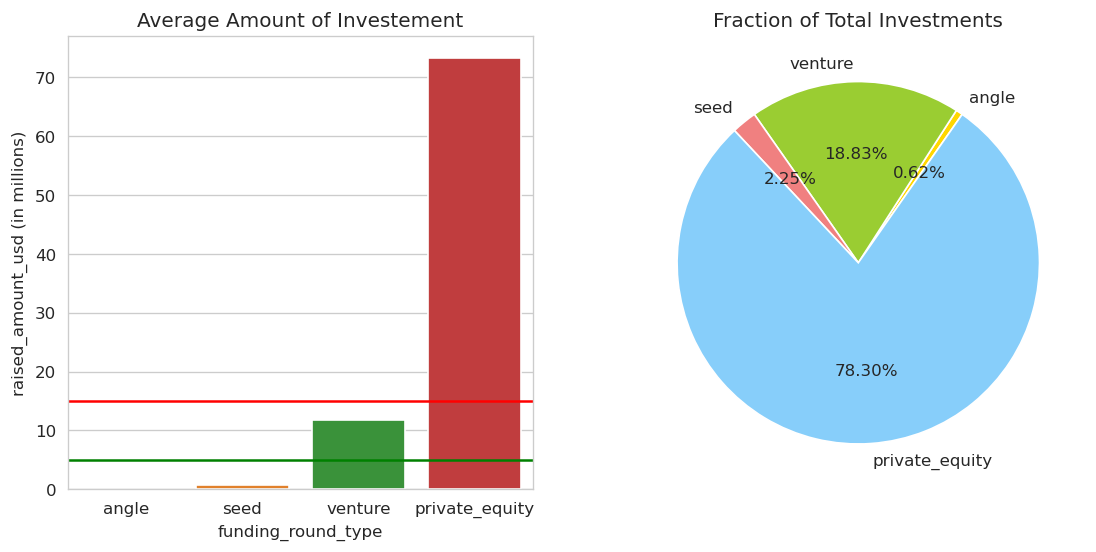

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[11,11],dpi=120,edgecolor='c')
# subplot 1 - Average Amount of Investment
plt.subplot(221)
sns.barplot(x=master_frame['funding_round_type'],y=master_frame['raised_amount_usd']/1000000,estimator=np.mean,order=["angle","seed","venture","private_equity"],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.axhline(5, color='green')
plt.axhline(15, color='red')
plt.title("Average Amount of Investement") 

# subplot 1 - Fraction of Total Investments(globally)
plt.subplot(222)
plt.title('Fraction of Total Investments')
# Data to plot
labels = ['angle', 'venture', 'seed', 'private_equity']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# Plot
plt.pie(pie_plot, labels=labels, colors=colors,autopct='%1.2f%%', startangle=55)

plt.show()

A plot showing the top 9 countries against the total amount of investments of funding type Venture    
1. top9 a DataFrame with Country code and English Speaking Flag as per wiki page provided for top 9 countries
2. Joined top9 and English_Speaking DataFrames  
3. Used a `bivariate bar plot` graph to show `Total Invenstment Amount` (Y-Axis) for `Top 9 Countries` (X-Axis) with hue as `English Speaking Country Flag`
    
#### This makes it very clear that the top 3 English speaking countries with highest investment

In [99]:
English_Speaking=pd.DataFrame({'country_code': ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'],
                                'English_Speaking_Flag': ['Y','N','Y','Y','Y','N','Y','N','N']})
English_Speaking.head(9)

,country_code,English_Speaking_Flag
0,USA,Y
1,CHN,N
2,GBR,Y
3,IND,Y
4,CAN,Y
5,FRA,N
6,ISR,Y
7,DEU,N
8,JPN,N


In [92]:
top9=pd.merge(top9,English_Speaking,how='inner',on='country_code')
top9.head(9)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,sector,English_Speaking_Flag
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,MEDIA,Y
1,/ORGANIZATION/21DIAMONDS-INDIA,21Diamonds,E-Commerce,operating,IND,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,E-COMMERCE,Y
2,/ORGANIZATION/247-LEARNING-PRIVATE,24x7 Learning,EdTech|Education|Systems,operating,IND,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.0,EDTECH,Y
3,/ORGANIZATION/3DSOC,3DSoC,3D|Mobile,operating,IND,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,3D,Y
4,/ORGANIZATION/3DSOC,3DSoC,3D|Mobile,operating,IND,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.0,3D,Y
5,/ORGANIZATION/A-LITTLE-WORLD,A LITTLE WORLD,Finance,operating,IND,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,FINANCE,Y
6,/ORGANIZATION/ACB-INDIA-LIMITED,ACB (India) Limited,Energy|Mining Technologies,operating,IND,/funding-round/e8be4d4069d490218db8008f4aefa0f0,venture,31-03-2008,25090000.0,ENERGY,Y
7,/ORGANIZATION/ADLABS-IMAGICA,Adlabs Imagica,Entertainment|Tourism,operating,IND,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.0,ENTERTAINMENT,Y
8,/ORGANIZATION/AGILE,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,FINANCE,Y


In [93]:
top9.groupby('country_code')['raised_amount_usd'].sum()

country_code
CAN    9.583332e+09
CHN    3.983542e+10
DEU    6.346960e+09
FRA    7.259537e+09
GBR    2.024563e+10
IND    1.439186e+10
ISR    6.907515e+09
JPN    3.363677e+09
USA    4.225108e+11
Name: raised_amount_usd, dtype: float64

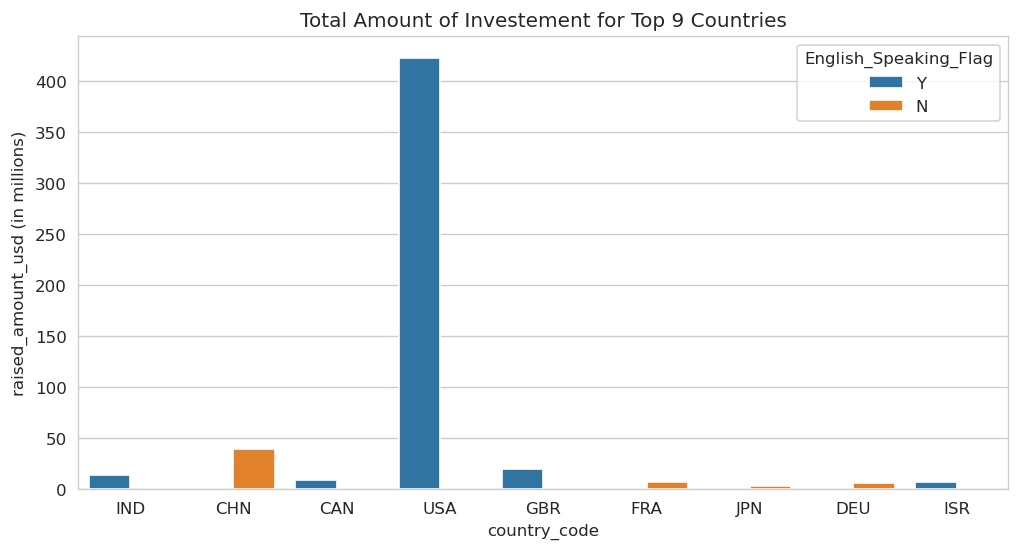

In [94]:
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x=top9['country_code'],y=top9['raised_amount_usd']/1000000000,estimator=np.sum,hue=top9['English_Speaking_Flag'],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Total Amount of Investement for Top 9 Countries") 
plt.show()

### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart for the chosen investment type of Venture
1. Reset Index of Total Investment DataFrames for top 3 Countries for easy plotting
2. Took top 3 main sectors by highest Total Investment Count for each Country 
3. Added `Country` Column in each Country DataFrame for bivariate bar plotting of sectors and countries
4. Outer Joined all the 3 Countries DataFrames so total 9 entries will there for top 3 sectors or top 3 Countries
5. Used a `bivariate bar plot` graph to show `Total Invenstment Count` (Y-Axis) for `Top 3 Countries` (X-Axis) with hue as `Main-Sector`

In [95]:
master_data = D1[D1['main_sector'].isin([top_sector_D1, sec_sector_D1,th_sector_D1])]
master_data

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,sector,main_sector,value
1249,/ORGANIZATION/22ND-CENTURY-GROUP,22nd Century Group,ipo,USA,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,18-09-2014,10000000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
1254,/ORGANIZATION/23ANDME,23andMe,operating,USA,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,07-01-2011,9000000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
1255,/ORGANIZATION/23ANDME,23andMe,operating,USA,/funding-round/c27c1b420dfb34677a6ba449524f1c88,venture,18-06-2009,12600000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
1257,/ORGANIZATION/23ANDME,23andMe,operating,USA,/funding-round/f261366b4fbf1840ad71b20ea0d9c7ce,venture,03-10-2007,9000000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
1259,/ORGANIZATION/3-V-BIOSCIENCES,3-V Biosciences,operating,USA,/funding-round/069e2f1ded2f499d232c3d7ec762c0e2,venture,17-03-2015,14278567.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
...,...,...,...,...,...,...,...,...,...,...,...
44079,/ORGANIZATION/THREDHQ,Thredhq,operating,USA,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,18-09-2013,5000000.0,SOCIAL + MOBILE + LOCAL,"Social, Finance, Analytics, Advertising",1
44084,/ORGANIZATION/WIZROCKET-TECHNOLOGIES,CleverTap,operating,USA,/funding-round/195738852853780cc8f1220ba6fb761d,venture,03-08-2015,8000000.0,CONSUMER BEHAVIOR,"Social, Finance, Analytics, Advertising",1
44088,/ORGANIZATION/USER-INTERFACE,User Interface,operating,USA,/funding-round/ade267714c6ee533323f46a25b2db237,venture,24-01-2001,8250000.0,USER INTERFACE,Others,1
44090,/ORGANIZATION/WASHIO,Washio,operating,USA,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,09-06-2014,10500000.0,SERVICE INDUSTRIES,Others,1


In [96]:
master_data=master_data.append(D2[D2['main_sector'].isin([top_sector_D2, sec_sector_D2,th_sector_D2])], ignore_index=True)
master_data

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,sector,main_sector,value
0,/ORGANIZATION/22ND-CENTURY-GROUP,22nd Century Group,ipo,USA,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,18-09-2014,10000000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
1,/ORGANIZATION/23ANDME,23andMe,operating,USA,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,07-01-2011,9000000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
2,/ORGANIZATION/23ANDME,23andMe,operating,USA,/funding-round/c27c1b420dfb34677a6ba449524f1c88,venture,18-06-2009,12600000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
3,/ORGANIZATION/23ANDME,23andMe,operating,USA,/funding-round/f261366b4fbf1840ad71b20ea0d9c7ce,venture,03-10-2007,9000000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
4,/ORGANIZATION/3-V-BIOSCIENCES,3-V Biosciences,operating,USA,/funding-round/069e2f1ded2f499d232c3d7ec762c0e2,venture,17-03-2015,14278567.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
...,...,...,...,...,...,...,...,...,...,...,...
8419,/ORGANIZATION/LOST-MY-NAME,Lost My Name,operating,GBR,/funding-round/f40170cca8f612ead56ede1b34c480d2,venture,25-06-2015,9000000.0,KIDS,Others,1
8420,/ORGANIZATION/ZOOPLA,Zoopla,ipo,GBR,/funding-round/0ec759962079a8997eb1632d6c1a769b,venture,23-12-2010,5005659.0,PROPERTY MANAGEMENT,"Social, Finance, Analytics, Advertising",1
8421,/ORGANIZATION/ZOOPLA,Zoopla,ipo,GBR,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,PROPERTY MANAGEMENT,"Social, Finance, Analytics, Advertising",1
8422,/ORGANIZATION/YOYO,Yoyo Wallet,operating,GBR,/funding-round/b18a6d85f32d12ace2366c0b7f85facc,venture,15-04-2015,10000000.0,LOYALTY PROGRAMS,Others,1


In [97]:
master_data=master_data.append(D3[D3['main_sector'].isin([top_sector_D3, sec_sector_D3,th_sector_D3])], ignore_index=True)
master_data.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,sector,main_sector,value
0,/ORGANIZATION/22ND-CENTURY-GROUP,22nd Century Group,ipo,USA,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,18-09-2014,10000000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
1,/ORGANIZATION/23ANDME,23andMe,operating,USA,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,07-01-2011,9000000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
2,/ORGANIZATION/23ANDME,23andMe,operating,USA,/funding-round/c27c1b420dfb34677a6ba449524f1c88,venture,18-06-2009,12600000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
3,/ORGANIZATION/23ANDME,23andMe,operating,USA,/funding-round/f261366b4fbf1840ad71b20ea0d9c7ce,venture,03-10-2007,9000000.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1
4,/ORGANIZATION/3-V-BIOSCIENCES,3-V Biosciences,operating,USA,/funding-round/069e2f1ded2f499d232c3d7ec762c0e2,venture,17-03-2015,14278567.0,BIOTECHNOLOGY,Cleantech / Semiconductors,1


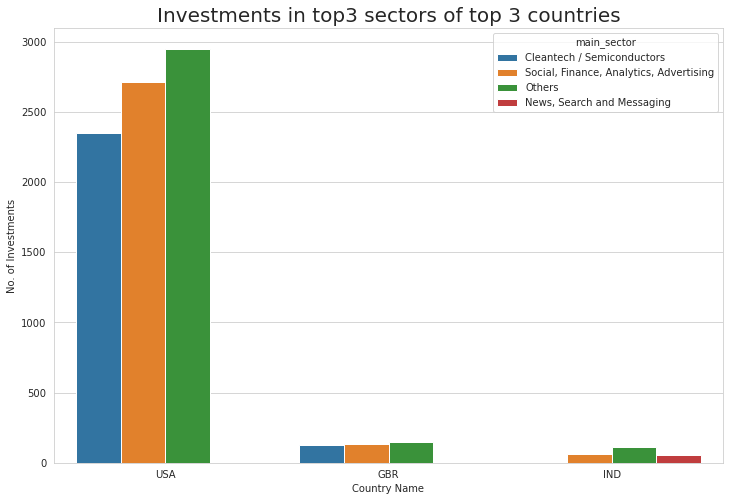

In [98]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_data,estimator=lambda x: len(x))
s.set(xlabel='Country Name', ylabel='No. of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =20)
plt.show()